In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
#Importing the required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

## Importing Data

In [4]:
leadx_data= pd.read_csv("D:\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
leadx_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Shape of the Dataset
leadx_data.shape

(9240, 37)

In [6]:
#Summary of the Dataset
leadx_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking the types of data present in the Dataset
leadx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking missing data percentage

round(100*leadx_data.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Assuming column with more than 45% of missing data to drop from the Dataframe
# creating list of those columns

drop_col=list(leadx_data.columns[leadx_data.isnull().mean()>0.45])
drop_col

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [10]:
#Dropping all the columns with >45% missing values

leadx_data.drop(columns=drop_col ,inplace=True)
leadx_data.shape

(9240, 32)

In [11]:
# Checking for missing values again from remaining columns

round(100*leadx_data.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Data Preparation

In [12]:
# Imputing the missing value of the column TotalVisits with the median value
leadx_data['TotalVisits'] = leadx_data['TotalVisits'].fillna(leadx_data['TotalVisits'].median()).astype(int)

In [13]:
# Imputing the missing value of the column Page_views_per_visit with the median value 
leadx_data['Page Views Per Visit'].fillna(leadx_data['Page Views Per Visit'].median(), inplace= True)

In [14]:
leadx_data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [15]:
round(leadx_data['Country'].value_counts(normalize= True, dropna= False)*100, 2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Philippines              0.02
Uganda                   0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Asia/Pacific Region      0.02
China                    0.02
Belgium                  0.02
Ghana                    0.02
Kenya                    0.01
Sri Lanka                0.01
Tanzania                 0.01
Malaysia                 0.01
Liberia   

In [16]:
leadx_data['Country'] = leadx_data['Country'].replace(np.nan, 'India')

In [17]:
#Finding the columns consisting of the value 'Select'
select_columns = [col for col in leadx_data.select_dtypes(include='object')
                  if leadx_data[col].str.contains('Select', na=False).any()]

print(select_columns)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [18]:
# replace values
leadx_data[select_columns] = leadx_data[select_columns].replace('Select', np.NaN)

In [19]:
leadx_data['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [20]:
round(leadx_data['Specialization'].value_counts(normalize= True, dropna= False)*100, 2)

NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [21]:
#Since there is no significant difference among the top 3 Specializations, it is safe to impute NaN with Others
leadx_data['Specialization'] = leadx_data['Specialization'].replace(np.NaN, 'Others')

In [22]:
leadx_data['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [23]:
round(leadx_data['City'].value_counts(normalize= True, dropna= False)*100, 2)

NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

In [24]:
leadx_data['City'] = leadx_data['City'].replace(np.nan, 'Mumbai')

In [25]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    leadx_data[feature] = leadx_data[feature].apply(lambda x : 1 if x=='Yes' else 0)
leadx_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0,0,0.0,Page Visited on Website,India,Others,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,NaN,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5,674,2.5,Email Opened,India,Others,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,NaN,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,NaN,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2,1428,1.0,Converted to Lead,India,Others,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,NaN,Mumbai,0,0,Modified


In [26]:
#More than 80% of the data is of the value 'Unemployed' so it is safe to impute the NaN values to Unemployed
leadx_data['What is your current occupation'] = leadx_data['What is your current occupation'].replace(np.nan, 'Unemployed')

leadx_data['What matters most to you in choosing a course'] = leadx_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

leadx_data['Tags'] = leadx_data['Tags'].replace(np.nan, 'Will revert after reading the email')


In [27]:
#Dropping the Columns that are unusable

leadx_data.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

## Exploratory Data Analysis

In [28]:
#The 'Converted' column is the target variable
leadx_data['Converted'].value_counts(normalize= True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [29]:
leadx_data['Lead Source'] = leadx_data['Lead Source'].replace(['google'], 'Google')

leadx_data['Lead Source'] = leadx_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'PAy per Click Ads',
                                       'Press_Release', 'Social Media', 'WeLearn', 'bing','blog', 'testone', 'welearnblog_Home',
                                       'youtubechannel'], 'Others')

In [30]:
#A Function for Conversion Summaries
def conversion_summary(df, col):
    grouped = df.groupby([col, 'Converted'])['Lead Number'].count().unstack(fill_value=0)
    grouped['Conversion(%)'] = (grouped[1] / (grouped[0] + grouped[1])).round(2) * 100
    sorted_summary = grouped.sort_values(by='Conversion(%)', ascending=False)
    print(sorted_summary)

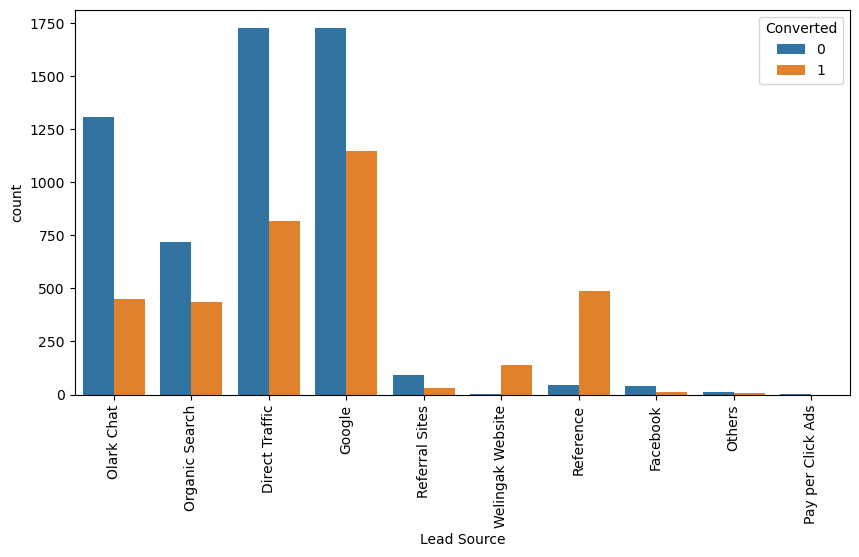

In [31]:
# Lead Source
plt.figure(figsize= (10,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leadx_data)
plt.xticks(rotation = 'vertical')
plt.show()

In [32]:
conversion_summary(leadx_data, 'Lead Source')

Converted             0     1  Conversion(%)
Lead Source                                 
Welingak Website      2   140           99.0
Reference            44   490           92.0
Others               13     9           41.0
Google             1726  1147           40.0
Organic Search      718   436           38.0
Direct Traffic     1725   818           32.0
Olark Chat         1307   448           26.0
Referral Sites       94    31           25.0
Facebook             42    13           24.0
Pay per Click Ads     1     0            0.0


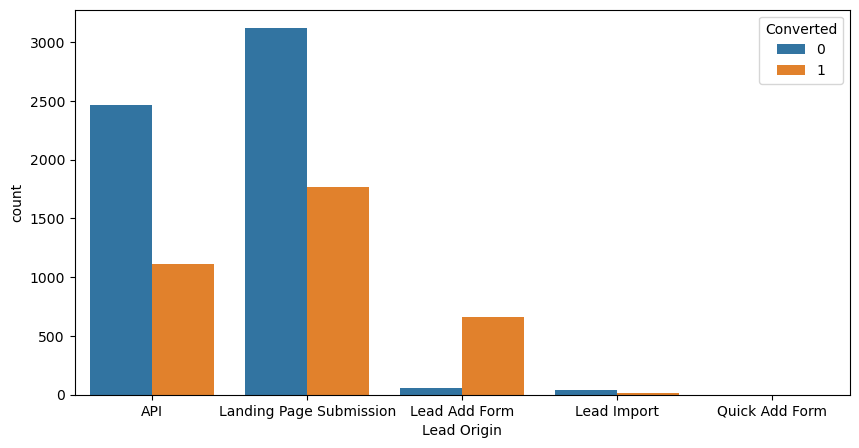

In [33]:
# Lead Origin
plt.figure(figsize= (10,5))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = leadx_data)
plt.show()

## OBSERVATION:

#### - API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable
#### -The count of leads from the Lead Add Form is pretty low but the conversion rate is very high
#### - Lead Import has very less count as well as conversion rate and hence can be ignored

### Need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form', to improve the lead conversion rate

In [34]:
conversion_summary(leadx_data, 'Lead Origin')

Converted                   0     1  Conversion(%)
Lead Origin                                       
Quick Add Form              0     1          100.0
Lead Add Form              54   664           92.0
Landing Page Submission  3118  1768           36.0
API                      2465  1115           31.0
Lead Import                42    13           24.0


In [35]:
# Converting all the low count categories to the 'Others' category
leadx_data['Last Activity'] = leadx_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

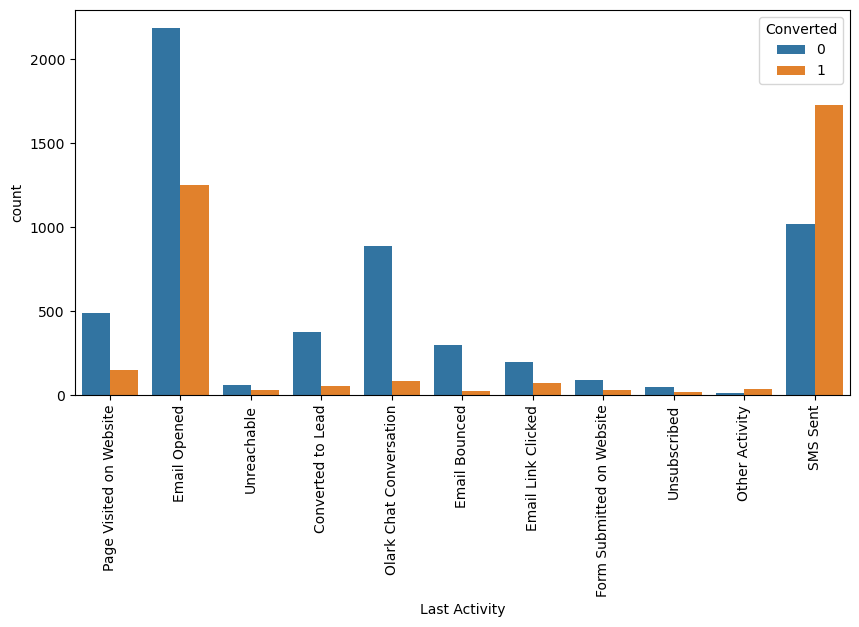

In [36]:
# Last Activity
plt.figure(figsize= (10,5))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = leadx_data)
plt.xticks(rotation = 'vertical')
plt.show()

## OBSERVATION:

#### - The count of lst activity as "Email Opened" is max
#### - The conversion rate of SMS sent as last activity is maximum

In [37]:
conversion_summary(leadx_data, 'Last Activity')

Converted                     0     1  Conversion(%)
Last Activity                                       
Other Activity               14    37           73.0
SMS Sent                   1018  1727           63.0
Email Opened               2184  1253           36.0
Unreachable                  62    31           33.0
Email Link Clicked          194    73           27.0
Unsubscribed                 45    16           26.0
Form Submitted on Website    88    28           24.0
Page Visited on Website     489   151           24.0
Converted to Lead           374    54           13.0
Olark Chat Conversation     889    84            9.0
Email Bounced               300    26            8.0


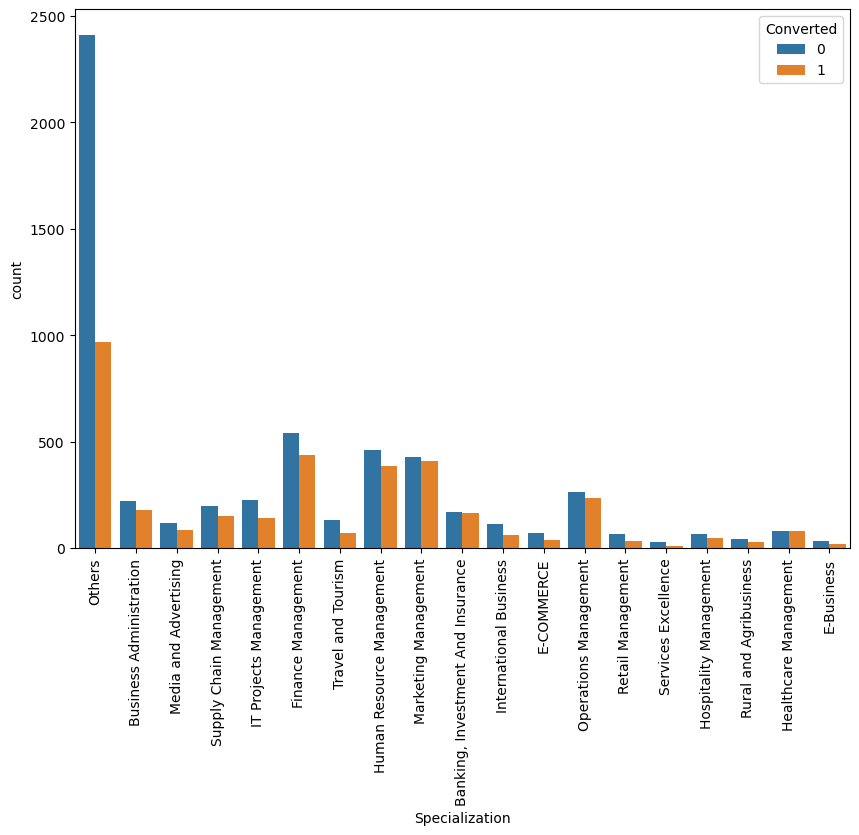

In [38]:
plt.figure(figsize= (10,7))
sns.countplot(x = 'Specialization', hue = 'Converted', data = leadx_data)
plt.xticks(rotation = 'vertical')
plt.show()

## OBSERVATION:

#### Looking at above plot, to increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

In [39]:
conversion_summary(leadx_data, 'Specialization')

Converted                             0    1  Conversion(%)
Specialization                                             
Healthcare Management                80   79           50.0
Banking, Investment And Insurance   171  167           49.0
Marketing Management                430  408           49.0
Operations Management               265  238           47.0
Human Resource Management           460  388           46.0
Finance Management                  540  436           45.0
Business Administration             224  179           44.0
Supply Chain Management             198  151           43.0
Rural and Agribusiness               42   31           42.0
Hospitality Management               66   48           42.0
Media and Advertising               118   85           42.0
IT Projects Management              226  140           38.0
E-Business                           36   21           37.0
International Business              114   64           36.0
E-COMMERCE                           72 

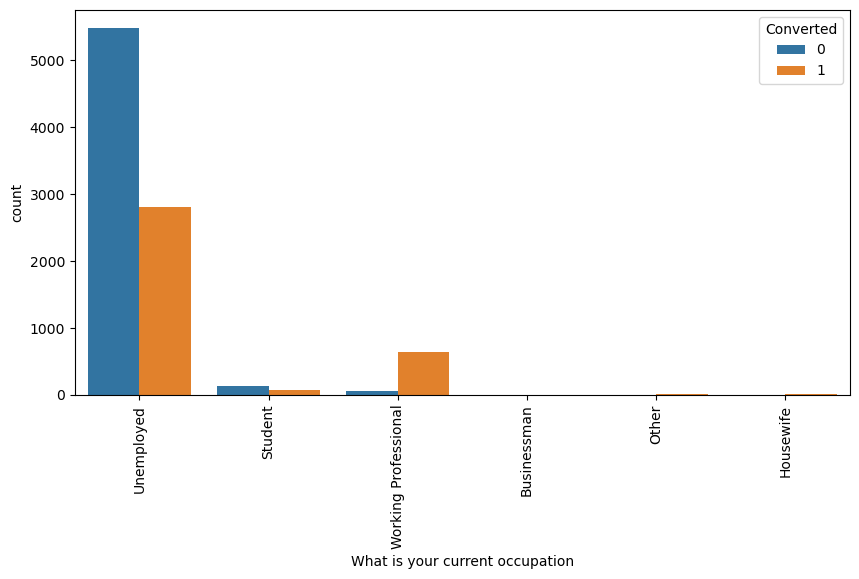

In [40]:
plt.figure(figsize= (10,5))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = leadx_data)
plt.xticks(rotation = 'vertical')
plt.show()

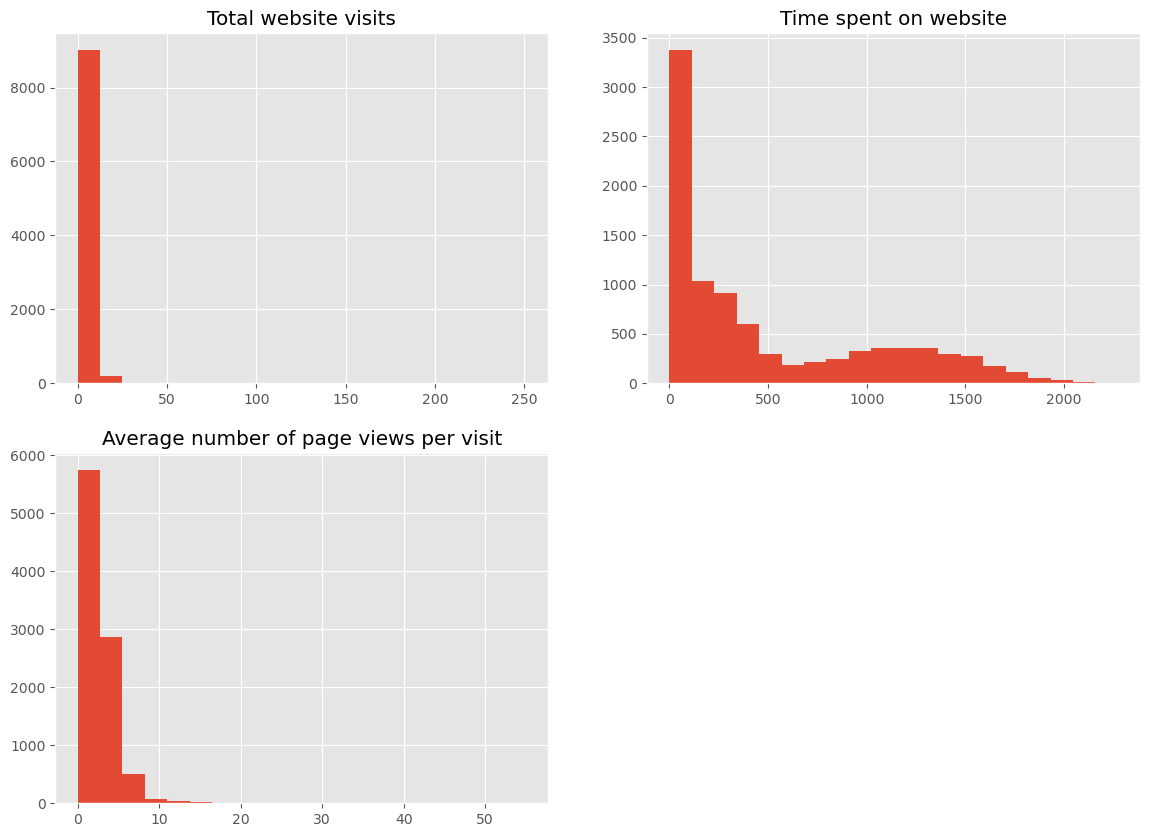

In [41]:
plt.style.use('ggplot')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(leadx_data.TotalVisits, bins=20)
axes[0, 0].set_title('Total website visits')

axes[0, 1].hist(leadx_data['Total Time Spent on Website'], bins=20)
axes[0, 1].set_title('Time spent on website')

axes[1, 0].hist(leadx_data['Page Views Per Visit'], bins=20)
axes[1, 0].set_title('Average number of page views per visit') 

fig.delaxes(axes[1,1])

plt.show()

In [42]:
# Dropping unnecessary columns

leadx_data = leadx_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

leadx_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,Modified


In [43]:
# Creating dummy variables

dum_var = pd.get_dummies(leadx_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                        'Tags','City','Last Notable Activity']], drop_first=True)
dum_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:
# We have created dummies for the below variables, so we can drop them
leadx_data = leadx_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity'], axis=1)
leadx_data.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2,1428,1.0


In [45]:
# Combining dummy data with the original dataset

leadx_data = pd.concat([leadx_data, dum_var], axis=1)
leadx_data.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2,1428,1.0,1,0,0,0,0,1,

In [46]:
leadx_data.shape

(9240, 97)

## Train-Test Split

In [47]:
# Putting feature variable to X
x = leadx_data.drop(['Prospect ID','Converted'], axis=1)
# Putting response variable to y
y = leadx_data['Converted']

In [48]:
# Splitting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [49]:
scaler = StandardScaler()

x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.100767,0.005716,-0.470569,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.290067,-0.691418,0.070401,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.290067,1.365219,1.226321,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [50]:
# Checking the Conversion Rate

print("Conversion rate is ", (sum(leadx_data['Converted'])/len(leadx_data['Converted'].index))*100)


Conversion rate is  38.53896103896104


In [51]:
# Checking Correlation 
corr = leadx_data.corr()

# Unstacking the correlation matrix to find out top correlations
corr_unstacked = corr.unstack().sort_values(kind="quicksort")
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                              0.981709
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed                0.877108
Last Activity_Email Opened             Last Notable Activity_Email Opened                0.862718
Lead Origin_Lead Add Form              Lead Source_Reference                             0.853237
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                    0.852707
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked          0.800764
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website     0.692057
Do Not Email                           Last Activity_Email Bounced                       0.618470
Last Activity_Unreachable              Last Notable Activity_Unreachable                 0.584642
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.522885
dtype: float64

In [52]:
# Dropping highly correlated features

x_train = x_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)


x_test = x_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)


In [53]:
conv_corr = x_train.corr()

In [54]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool_)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form              Lead Source_Reference                             0.862134
Do Not Email                           Last Activity_Email Bounced                       0.631980
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.536902
Lead Source_Olark Chat                 Specialization_Others                             0.498444
Page Views Per Visit                   Lead Origin_Landing Page Submission               0.482162
TotalVisits                            Page Views Per Visit                              0.472658
Lead Source_Olark Chat                 Last Activity_Olark Chat Conversation             0.430903
Last Activity_Olark Chat Conversation  Last Notable Activity_Olark Chat Conversation     0.407519
Lead Origin_Lead Add Form              Lead Source_Welingak Website                      0.406570
Last Activity_Email Bounced            Last Notable Activity_Email Bounced               0.406262
dtype: float64

## Model Building

In [55]:
# feature selection using RFE

lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [56]:
#Features selected by RFE
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 8),
 ('TotalVisits', False, 51),
 ('Total Time Spent on Website', False, 11),
 ('Page Views Per Visit', False, 61),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 63),
 ('Lead Origin_Quick Add Form', False, 43),
 ('Lead Source_Google', False, 46),
 ('Lead Source_Olark Chat', False, 27),
 ('Lead Source_Organic Search', False, 45),
 ('Lead Source_Others', False, 49),
 ('Lead Source_Pay per Click Ads', False, 73),
 ('Lead Source_Reference', False, 47),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 32),
 ('Last Activity_Email Link Clicked', False, 29),
 ('Last Activity_Email Opened', False, 48),
 ('Last Activity_Form Submitted on Website', False, 55),
 ('Last Activity_Olark Chat Conversation', False, 33),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 30),
 

In [57]:
col = x_train.columns[rfe.support_]

In [58]:
#Statsmodels
x_train_sm = sm.add_constant(x_train[col])
logm = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.1
Date:                Tue, 17 Oct 2023   Deviance:                       4160.2
Time:                        11:33:48   Pearson chi2:                 1.26e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4965
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5134      0.197    -17.817      0.000      -3.900      -3.127
Lead Origin_Lead Add Form                                2.3277      0.232     10.026      0.000       1.873       2.783
Lead Source_Welingak Website                             1.4952      0.775      1.929      0.054      -0.024       3.014
Last Activity_Other Activity                             2.0876      0.576      3.627      0.000       0.959       3.216
Last Activity_SMS Sent                                   1.8497      0.088     21.015      0.000       1.677       2.022
What is your current occupation_Working Professional     3.0849      0.236     13.097      0.000       2.623       3.547
Tags_Busy                                                2.7820      0.283      9.844      0.000       2.228       3.336
Tags_Closed by Horizzon                                  9.2820      1.028      9.031      0.000       7.267      11.297
Tags_Interested in Next batch                           23.9637   2.08e+04      0.001      0.999   -4.08e+04    4.09e+04
Tags_Lateral student                                    25.3417   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
Tags_Lost to EINS                                        8.6057      0.747     11.517      0.000       7.141      10.070
Tags_Ringing                                            -1.1983      0.293     -4.083      0.000      -1.774      -0.623
Tags_Will revert after reading the email                 3.2908      0.198     16.656      0.000       2.904       3.678
Tags_switched off                                       -1.4351      0.548     -2.617      0.009      -2.510      -0.360
Last Notable Activity_Modified                          -1.7835      0.090    -19.849      0.000      -1.960      -1.607
Last Notable Activity_Olark Chat Conversation           -1.6921      0.319     -5.304      0.000      -2.317      -1.067
========================================================================================================================
"""

In [59]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

1871    0.008910
6795    0.444583
3516    0.008910
8105    0.054064
3934    0.118570
4844    0.991093
3297    0.008910
8071    0.999990
987     0.118570
7423    0.835771
dtype: float64

In [60]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0089096 , 0.44458337, 0.0089096 , 0.05406423, 0.11857015,
       0.99109297, 0.0089096 , 0.99998972, 0.11857015, 0.83577103])

In [61]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.008910,1871
1,0,0.444583,6795
2,0,0.008910,3516
3,0,0.054064,8105
4,0,0.118570,3934


In [62]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Predicted
0,0,0.008910,1871,0
1,0,0.444583,6795,0
2,0,0.008910,3516,0
3,0,0.054064,8105,0
4,0,0.118570,3934,0


In [63]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

Accuracy score 0.8593073593073594


In [64]:
#Fitting a Logistic Regression model

x_train_sm = sm.add_constant(x_train[col])
logm1 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.1
Date:                Tue, 17 Oct 2023   Deviance:                       4160.2
Time:                        11:34:06   Pearson chi2:                 1.26e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4965
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5134      0.197    -17.817      0.000      -3.900      -3.127
Lead Origin_Lead Add Form                                2.3277      0.232     10.026      0.000       1.873       2.783
Lead Source_Welingak Website                             1.4952      0.775      1.929      0.054      -0.024       3.014
Last Activity_Other Activity                             2.0876      0.576      3.627      0.000       0.959       3.216
Last Activity_SMS Sent                                   1.8497      0.088     21.015      0.000       1.677       2.022
What is your current occupation_Working Professional     3.0849      0.236     13.097      0.000       2.623       3.547
Tags_Busy                                                2.7820      0.283      9.844      0.000       2.228       3.336
Tags_Closed by Horizzon                                  9.2820      1.028      9.031      0.000       7.267      11.297
Tags_Interested in Next batch                           23.9637   2.08e+04      0.001      0.999   -4.08e+04    4.09e+04
Tags_Lateral student                                    25.3417   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
Tags_Lost to EINS                                        8.6057      0.747     11.517      0.000       7.141      10.070
Tags_Ringing                                            -1.1983      0.293     -4.083      0.000      -1.774      -0.623
Tags_Will revert after reading the email                 3.2908      0.198     16.656      0.000       2.904       3.678
Tags_switched off                                       -1.4351      0.548     -2.617      0.009      -2.510      -0.360
Last Notable Activity_Modified                          -1.7835      0.090    -19.849      0.000      -1.960      -1.607
Last Notable Activity_Olark Chat Conversation           -1.6921      0.319     -5.304      0.000      -2.317      -1.067
========================================================================================================================
"""

In [65]:
# Checking Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
6,Tags_Closed by Horizzon,1.27
1,Lead Source_Welingak Website,1.25
5,Tags_Busy,1.04
9,Tags_Lost to EINS,1.04
12,Tags_switched off,1.04
14,Last Notable Activity_Olark Chat Conversation,1.03
2,Last Activity_Other Activity,1.02
7,Tags_Interested in Next batch,1.00
8,Tags_Lateral student,1.00
4,What is your current occupation_Working Profes...,0.59


In [67]:
# dropping the column with p-value > 0.050
#x_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)
col = col.drop('Lead Source_Welingak Website', 1)
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [68]:
# Let's re-run the model using the selected variables
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.7
Date:                Tue, 17 Oct 2023   Deviance:                       4165.4
Time:                        11:34:52   Pearson chi2:                 1.31e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4961
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5211      0.198    -17.820      0.000      -3.908      -3.134
Lead Origin_Lead Add Form                                2.5419      0.216     11.750      0.000       2.118       2.966
Last Activity_Other Activity                             2.0812      0.577      3.610      0.000       0.951       3.211
Last Activity_SMS Sent                                   1.8499      0.088     21.029      0.000       1.677       2.022
What is your current occupation_Working Professional     3.0750      0.236     13.047      0.000       2.613       3.537
Tags_Busy                                                2.7870      0.283      9.852      0.000       2.233       3.341
Tags_Closed by Horizzon                                  9.2789      1.028      9.026      0.000       7.264      11.294
Tags_Interested in Next batch                           23.9538   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Tags_Lateral student                                    25.3190   2.39e+04      0.001      0.999   -4.69e+04     4.7e+04
Tags_Lost to EINS                                        8.6113      0.747     11.523      0.000       7.147      10.076
Tags_Ringing                                            -1.2257      0.295     -4.153      0.000      -1.804      -0.647
Tags_Will revert after reading the email                 3.2997      0.198     16.668      0.000       2.912       3.688
Tags_switched off                                       -1.4270      0.548     -2.602      0.009      -2.502      -0.352
Last Notable Activity_Modified                          -1.7810      0.090    -19.859      0.000      -1.957      -1.605
Last Notable Activity_Olark Chat Conversation           -1.6930      0.319     -5.307      0.000      -2.318      -1.068
========================================================================================================================
"""

In [69]:
col = col.drop('Tags_Interested in Next batch', 1)
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [70]:
# Let's re-run the model using the selected variables
x_train_sm = sm.add_constant(x_train[col])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2090.1
Date:                Tue, 17 Oct 2023   Deviance:                       4180.3
Time:                        11:36:40   Pearson chi2:                 1.32e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4949
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3987      0.186    -18.251      0.000      -3.764      -3.034
Lead Origin_Lead Add Form                                2.5513      0.216     11.826      0.000       2.129       2.974
Last Activity_Other Activity                             2.0780      0.574      3.623      0.000       0.954       3.202
Last Activity_SMS Sent                                   1.8682      0.088     21.253      0.000       1.696       2.040
What is your current occupation_Working Professional     3.0552      0.234     13.080      0.000       2.597       3.513
Tags_Busy                                                2.6549      0.275      9.649      0.000       2.116       3.194
Tags_Closed by Horizzon                                  9.1627      1.026      8.931      0.000       7.152      11.174
Tags_Lateral student                                    24.1847   1.45e+04      0.002      0.999   -2.84e+04    2.85e+04
Tags_Lost to EINS                                        8.4954      0.745     11.411      0.000       7.036       9.955
Tags_Ringing                                            -1.3635      0.287     -4.743      0.000      -1.927      -0.800
Tags_Will revert after reading the email                 3.1749      0.187     17.013      0.000       2.809       3.541
Tags_switched off                                       -1.5629      0.544     -2.871      0.004      -2.630      -0.496
Last Notable Activity_Modified                          -1.7892      0.090    -19.955      0.000      -1.965      -1.614
Last Notable Activity_Olark Chat Conversation           -1.6918      0.319     -5.305      0.000      -2.317      -1.067
========================================================================================================================
"""

In [71]:
col = col.drop('Tags_Lateral student', 1)
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [72]:
# Let's re-run the model using the selected variables
x_train_sm = sm.add_constant(x_train[col])
logm4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2097.1
Date:                Tue, 17 Oct 2023   Deviance:                       4194.1
Time:                        11:37:34   Pearson chi2:                 1.31e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4938
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3343      0.181    -18.432      0.000      -3.689      -2.980
Lead Origin_Lead Add Form                                2.5572      0.215     11.889      0.000       2.136       2.979
Last Activity_Other Activity                             2.0711      0.571      3.626      0.000       0.952       3.191
Last Activity_SMS Sent                                   1.8777      0.088     21.390      0.000       1.706       2.050
What is your current occupation_Working Professional     3.0407      0.232     13.092      0.000       2.586       3.496
Tags_Busy                                                2.5831      0.272      9.512      0.000       2.051       3.115
Tags_Closed by Horizzon                                  9.0888      1.025      8.868      0.000       7.080      11.098
Tags_Lost to EINS                                        8.4215      0.743     11.332      0.000       6.965       9.878
Tags_Ringing                                            -1.4364      0.284     -5.058      0.000      -1.993      -0.880
Tags_Will revert after reading the email                 3.1050      0.181     17.129      0.000       2.750       3.460
Tags_switched off                                       -1.6345      0.543     -3.013      0.003      -2.698      -0.571
Last Notable Activity_Modified                          -1.7789      0.089    -19.890      0.000      -1.954      -1.604
Last Notable Activity_Olark Chat Conversation           -1.6871      0.319     -5.292      0.000      -2.312      -1.062
========================================================================================================================
"""

In [73]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Predicted
0,0,0.008404,1871,0
1,0,0.442932,6795,0
2,0,0.008404,3516,0
3,0,0.052503,8105,0
4,0,0.118349,3934,0


In [74]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

Accuracy score 0.8582251082251082


In [75]:
# Recheck VIF
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.27
4,Tags_Busy,1.04
6,Tags_Lost to EINS,1.04
9,Tags_switched off,1.04
11,Last Notable Activity_Olark Chat Conversation,1.03
1,Last Activity_Other Activity,1.02
3,What is your current occupation_Working Profes...,0.58
2,Last Activity_SMS Sent,0.12
7,Tags_Ringing,0.10
8,Tags_Will revert after reading the email,0.09


In [76]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [77]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Predicted, print_score=True)

Confusion Matrix :
 [[3867  135]
 [ 782 1684]]
Accuracy : 0.8582251082251082
Sensitivity : 0.6828872668288727
Specificity : 0.9662668665667167
Precision : 0.925783397471138


(0.8582251082251082, 0.6828872668288727, 0.9662668665667167, 0.925783397471138)

In [78]:
#Plotting the ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

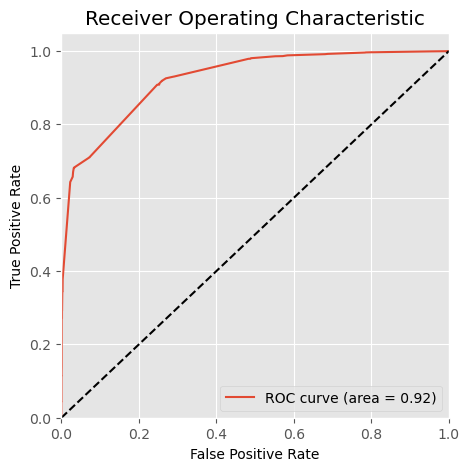

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

In [80]:
#Finding the Optimal Cut off

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.008404,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.442932,6795,0,1,1,1,1,1,0,0,0,0,0
2,0,0.008404,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.052503,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.118349,3934,0,1,1,0,0,0,0,0,0,0,0


In [81]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.381262,1.000000,0.000000,0.381262
0.1,0.1,0.690940,0.978913,0.513493,0.553543
0.2,0.2,0.808442,0.918897,0.740380,0.685628
0.3,0.3,0.808287,0.918491,0.740380,0.685533
0.4,0.4,0.808905,0.908354,0.747626,0.689231
0.5,0.5,0.858225,0.682887,0.966267,0.925783
0.6,0.6,0.858380,0.681265,0.967516,0.928177
0.7,0.7,0.855751,0.670722,0.969765,0.931831
0.8,0.8,0.849722,0.642741,0.977261,0.945704
0.9,0.9,0.760668,0.377534,0.996752,0.986229


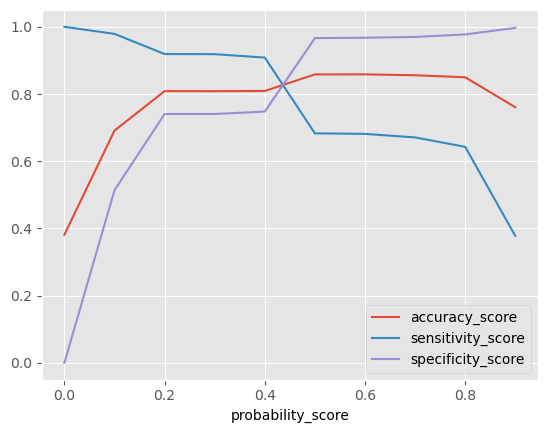

In [82]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

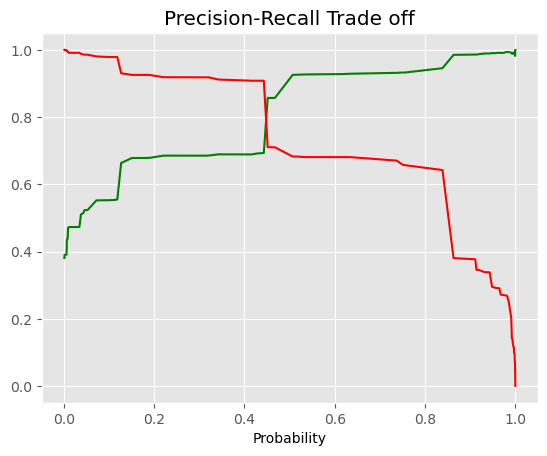

In [83]:
#Precision Recall Trade off

p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

In [84]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.008404,1871,0,1
1,0,0.442932,6795,1,44
2,0,0.008404,3516,0,1
3,0,0.052503,8105,0,5
4,0,0.118349,3934,0,12


In [85]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[3012  990]
 [ 226 2240]]
Accuracy : 0.8119975262832406
Sensitivity : 0.9083536090835361
Specificity : 0.7526236881559221
Precision : 0.6934984520123839


(0.8119975262832406,
 0.9083536090835361,
 0.7526236881559221,
 0.6934984520123839)

In [86]:
# Getting the predicted values on the test set
x_test_sm = sm.add_constant(x_test[col])
y_test_pred = res.predict(x_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,1,4269,0.838678,1,84
1,1,2376,0.985308,1,99
2,1,7766,0.943292,1,94
3,0,9199,0.005981,0,1
4,1,4359,0.911164,1,91


In [87]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[1225  452]
 [  88 1007]]
Accuracy : 0.8051948051948052
Sensitivity : 0.919634703196347
Specificity : 0.7304710793082886
Precision : 0.6901987662782728


(0.8051948051948052, 0.919634703196347, 0.7304710793082886, 0.6901987662782728)

In [88]:
# Building a logistic regression model that returns predicted values on training dataset
# when training data, test data and probability cutoff is given


def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [89]:
build_model_cutoff(x_train[col], y_train, x_test[col], y_test, cutoff=0.44)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         1871          0             0.008404                  0           1
1         6795          0             0.442932                  1          44
2         3516          0             0.008404                  0           1
3         8105          0             0.052503                  0           5
4         3934          0             0.118349                  0          12
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4269          1             0.838678                  1          84
1         2376          1             0.985308                  1          99
2         7766          1             0.943292                  1          94
3         9199          0             0.005981                  0           1
4         4359          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4269,1,0.838678,1,84
1,2376,1,0.985308,1,99
2,7766,1,0.943292,1,94
3,9199,0,0.005981,0,1
4,4359,1,0.911164,1,91
...,...,...,...,...,...
2767,8649,0,0.442932,1,44
2768,2152,1,0.985308,1,99
2769,7101,0,0.034415,0,3
2770,5331,0,0.118349,0,12


In [90]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Lead Origin_Lead Add Form', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                                  -3.334251
Lead Origin_Lead Add Form                               2.557200
Last Activity_Other Activity                            2.071127
Last Activity_SMS Sent                                  1.877697
What is your current occupation_Working Professional    3.040739
Tags_Busy                                               2.583125
Tags_Closed by Horizzon                                 9.088822
Tags_Lost to